<a href="https://colab.research.google.com/github/Aryanfour5/DropoutAnalysis/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import warnings

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
path="/content/drive/MyDrive/Final_Gujarat.csv"
df=pd.read_csv(path)
df

,Class,Previous qualification (Out of 200),Gender,Curricular units 1st sem (Out of 20),Curricular units 2nd sem (Out of 20),Region,School Type,Age,Caste,Target
0,4,135.0,0,13.296667,14.114286,Kolat,Government,10,GEN,Studying
1,4,145.0,1,11.600000,11.000000,Kolat,Government,10,SC,Studying
2,4,140.0,0,14.000000,13.500000,Kolat,Government,10,OBC,Studying
3,4,130.0,1,13.571429,12.333333,Kolat,Government,10,OBC,Studying
4,4,136.0,0,15.200000,13.200000,Jetapur,Government,10,ST,Studying
...,...,...,...,...,...,...,...,...,...,...
4419,10,135.0,0,11.166667,11.666667,Melaj,Government,17,SC,Studying
4420,10,158.0,0,14.057143,14.600000,Melaj,Government,17,GEN,Studying
4421,10,130.0,1,13.750000,0.000000,Melaj,Government,17,GEN,Dropout
4422,10,150.0,1,11.000000,10.500000,Melaj,Government,17,GEN,Dropout


In [155]:
df.dtypes

Class                                     int64
Previous qualification (Out of 200)     float64
Gender                                    int64
Curricular units 1st sem (Out of 20)    float64
Curricular units 2nd sem (Out of 20)    float64
Region                                   object
School Type                              object
Age                                       int64
Caste                                    object
Target                                   object
dtype: object

In [156]:
df.describe()

,Class,Previous qualification (Out of 200),Gender,Curricular units 1st sem (Out of 20),Curricular units 2nd sem (Out of 20),Age
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,7.997288,132.613314,0.351718,10.640822,10.230206,14.033228
std,1.714270,13.188332,0.477560,4.843663,5.210808,1.765607
min,4.000000,95.000000,0.000000,0.000000,0.000000,10.000000
25%,6.000000,125.000000,0.000000,11.000000,10.750000,12.000000
50%,9.000000,133.100000,0.000000,12.285714,12.200000,15.000000
75%,9.000000,140.000000,1.000000,13.400000,13.333333,15.000000
max,10.000000,190.000000,1.000000,18.875000,18.571429,17.000000


In [157]:
df.columns

Index(['Class', 'Previous qualification (Out of 200)', 'Gender',
       'Curricular units 1st sem (Out of 20)',
       'Curricular units 2nd sem (Out of 20)', 'Region', 'School Type', 'Age',
       'Caste', 'Target'],
      dtype='object')

In [158]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Class  Previous qualification (Out of 200)  Gender  \
0     False                                False   False   
1     False                                False   False   
2     False                                False   False   
3     False                                False   False   
4     False                                False   False   
...     ...                                  ...     ...   
4419  False                                False   False   
4420  False                                False   False   
4421  False                                False   False   
4422  False                                False   False   
4423  False                                False   False   

      Curricular units 1st sem (Out of 20)  \
0                                    False   
1                                    False   
2                                    False   
3                                

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Class                                 4424 non-null   int64  
 1   Previous qualification (Out of 200)   4424 non-null   float64
 2   Gender                                4424 non-null   int64  
 3   Curricular units 1st sem (Out of 20)  4424 non-null   float64
 4   Curricular units 2nd sem (Out of 20)  4424 non-null   float64
 5   Region                                4424 non-null   object 
 6   School Type                           4424 non-null   object 
 7   Age                                   4424 non-null   int64  
 8   Caste                                 4424 non-null   object 
 9   Target                                4424 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 345.8+ KB


array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'Previous qualification (Out of 200)'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Curricular units 1st sem (Out of 20)'}>],
       [<Axes: title={'center': 'Curricular units 2nd sem (Out of 20)'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

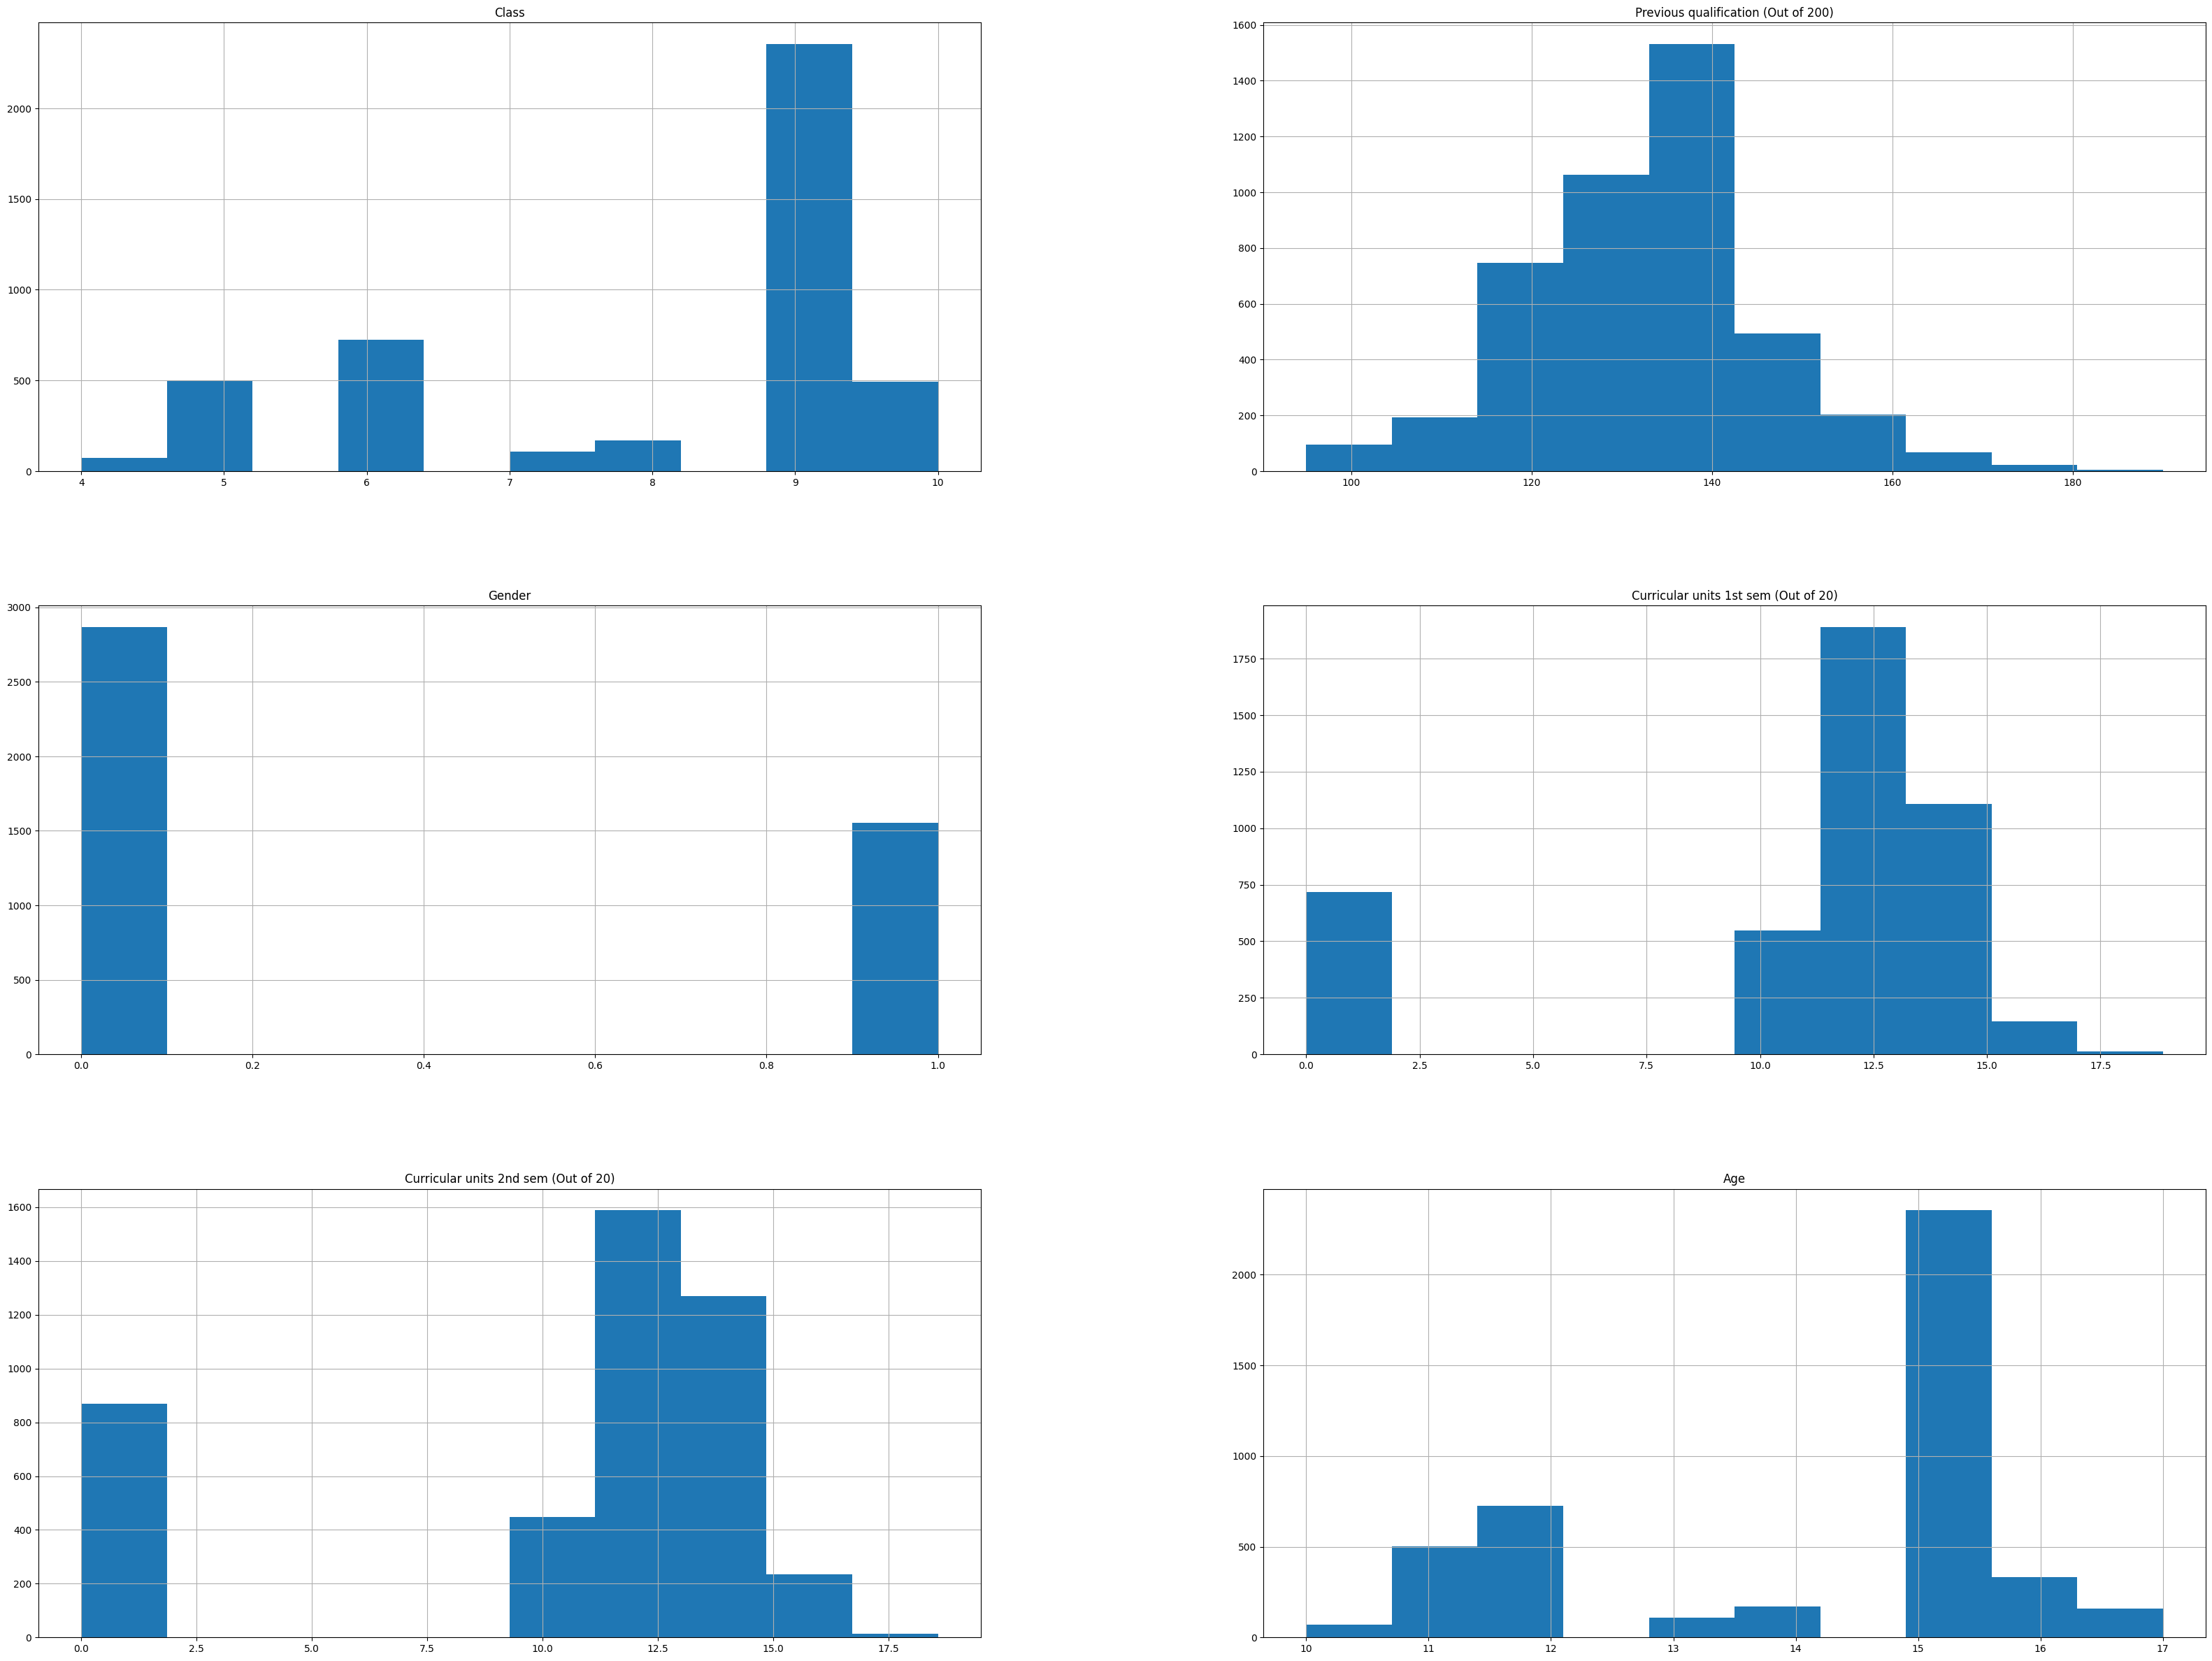

In [160]:
df.hist(figsize=(40,30))

In [161]:
df.count()

Class                                   4424
Previous qualification (Out of 200)     4424
Gender                                  4424
Curricular units 1st sem (Out of 20)    4424
Curricular units 2nd sem (Out of 20)    4424
Region                                  4424
School Type                             4424
Age                                     4424
Caste                                   4424
Target                                  4424
dtype: int64

In [162]:
df.drop_duplicates()

,Class,Previous qualification (Out of 200),Gender,Curricular units 1st sem (Out of 20),Curricular units 2nd sem (Out of 20),Region,School Type,Age,Caste,Target
0,4,135.0,0,13.296667,14.114286,Kolat,Government,10,GEN,Studying
1,4,145.0,1,11.600000,11.000000,Kolat,Government,10,SC,Studying
2,4,140.0,0,14.000000,13.500000,Kolat,Government,10,OBC,Studying
3,4,130.0,1,13.571429,12.333333,Kolat,Government,10,OBC,Studying
4,4,136.0,0,15.200000,13.200000,Jetapur,Government,10,ST,Studying
...,...,...,...,...,...,...,...,...,...,...
4419,10,135.0,0,11.166667,11.666667,Melaj,Government,17,SC,Studying
4420,10,158.0,0,14.057143,14.600000,Melaj,Government,17,GEN,Studying
4421,10,130.0,1,13.750000,0.000000,Melaj,Government,17,GEN,Dropout
4422,10,150.0,1,11.000000,10.500000,Melaj,Government,17,GEN,Dropout


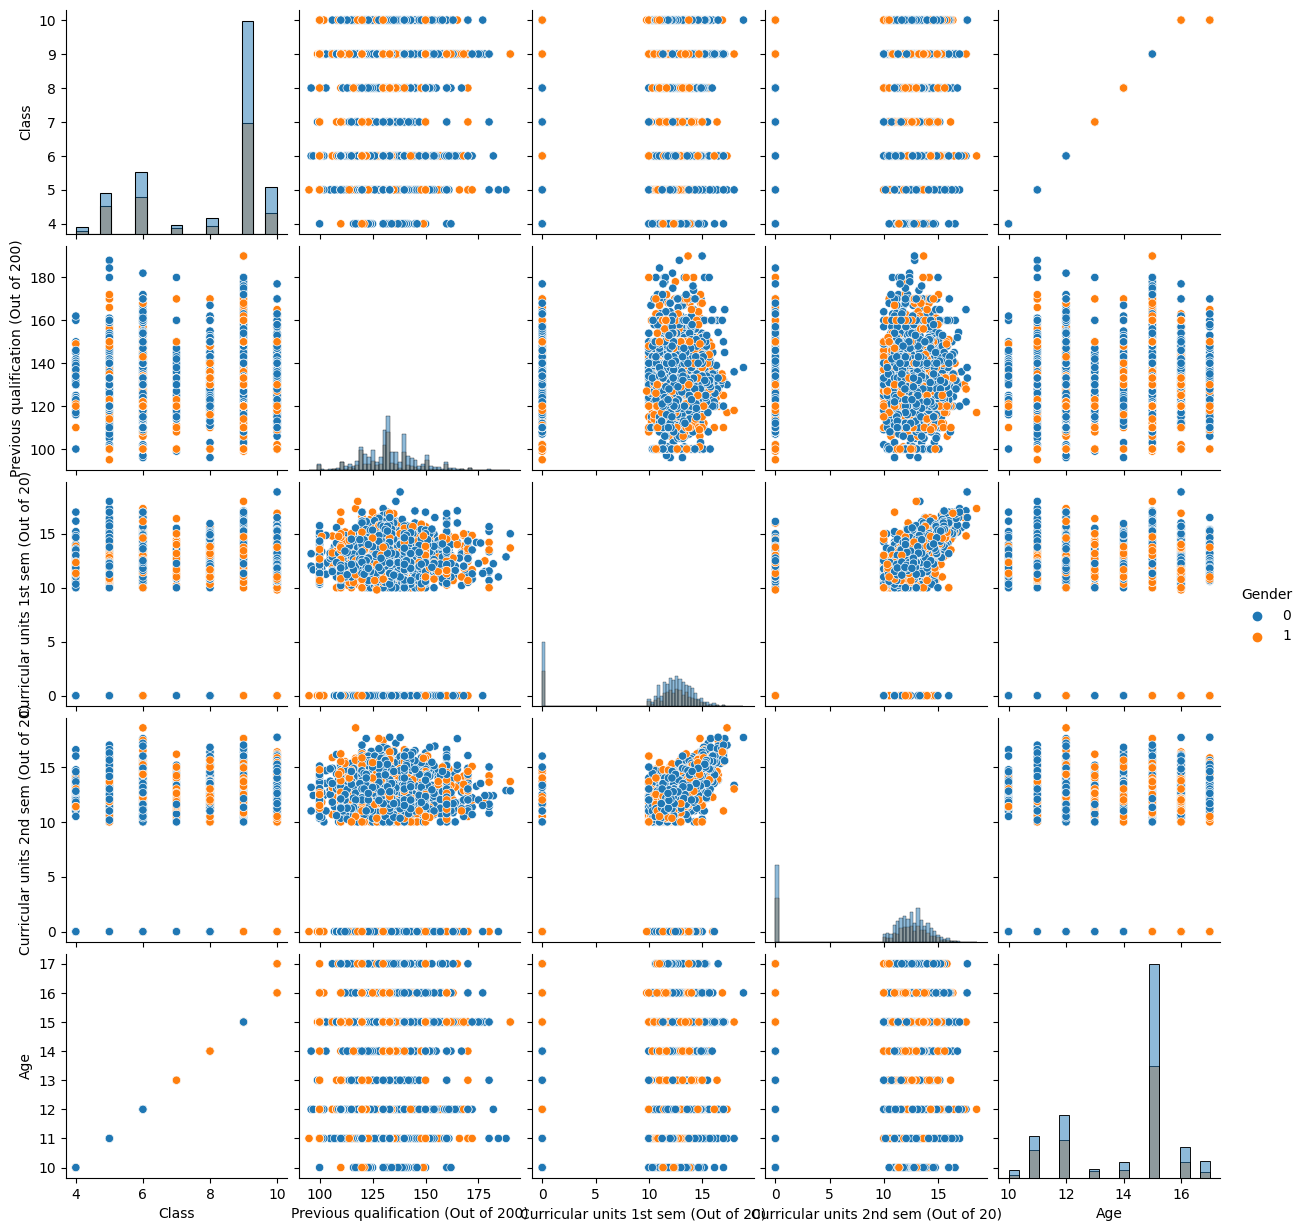

In [164]:
sb.pairplot(df,hue="Gender", diag_kind="hist")

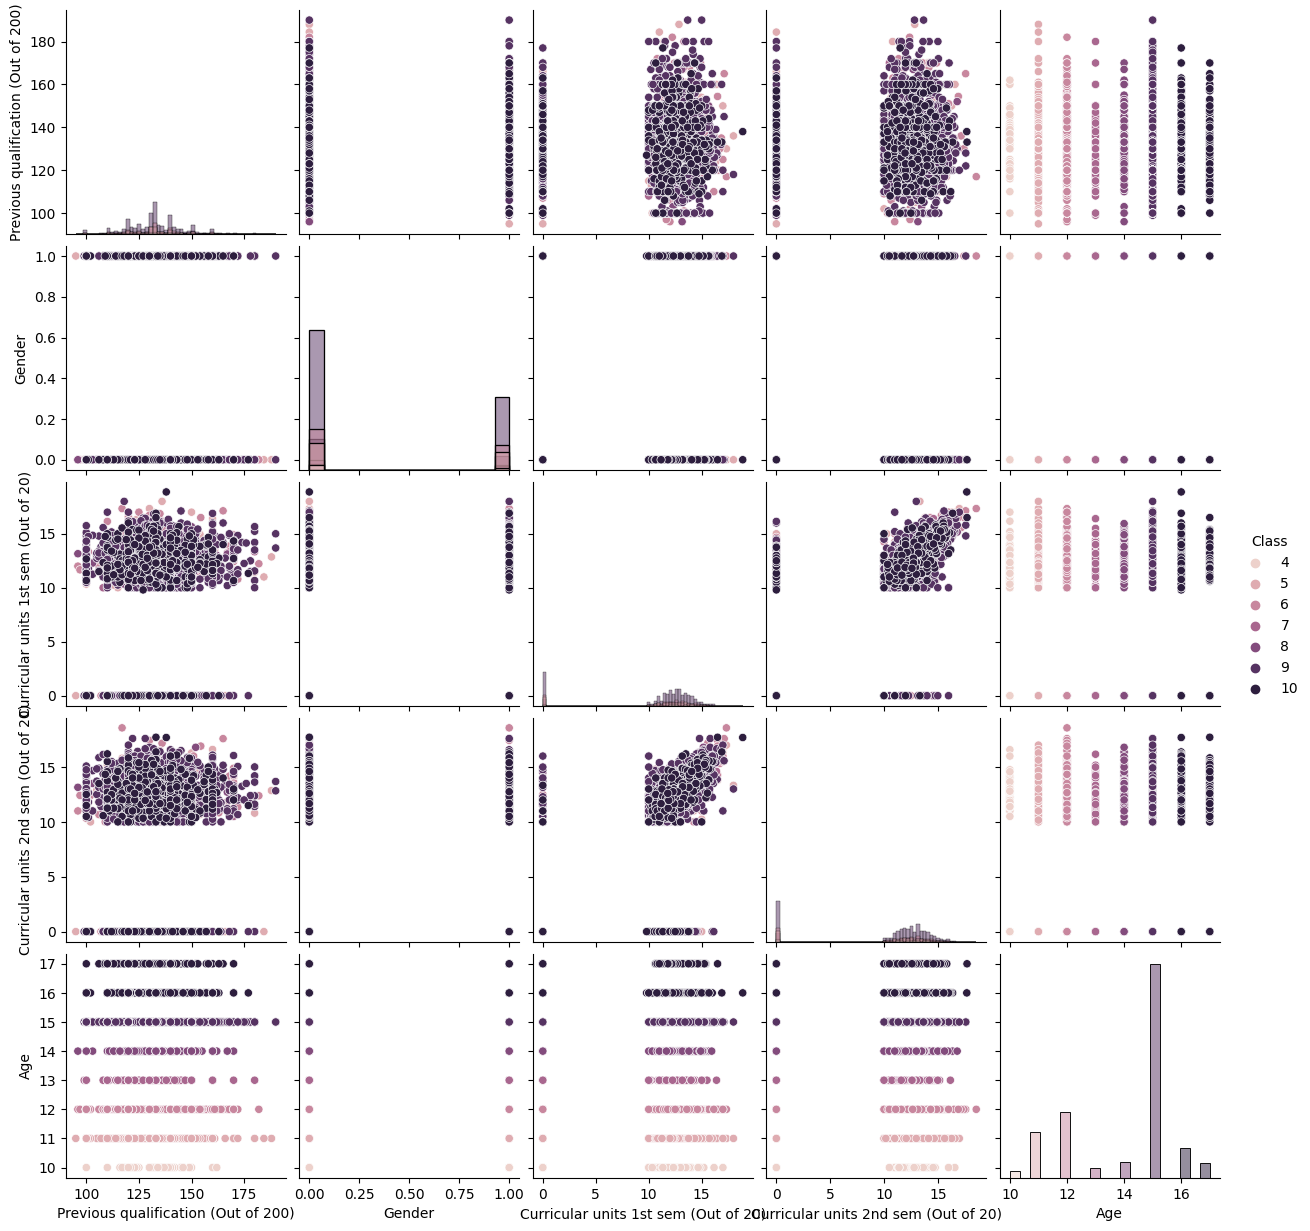

In [165]:
sb.pairplot(df,hue="Class", diag_kind="hist")

<ipython-input-166-befd89b0fc91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d=df.corr(method="pearson")


,Class,Previous qualification (Out of 200),Gender,Curricular units 1st sem (Out of 20),Curricular units 2nd sem (Out of 20),Age
Class,1.000000,0.024806,-0.042193,0.015392,0.030182,0.994710
Previous qualification (Out of 200),0.024806,1.000000,-0.047874,0.037912,0.022272,0.023329
Gender,-0.042193,-0.047874,1.000000,-0.003531,-0.009597,-0.044968
Curricular units 1st sem (Out of 20),0.015392,0.037912,-0.003531,1.000000,0.837170,0.017005
Curricular units 2nd sem (Out of 20),0.030182,0.022272,-0.009597,0.837170,1.000000,0.031550
Age,0.994710,0.023329,-0.044968,0.017005,0.031550,1.000000


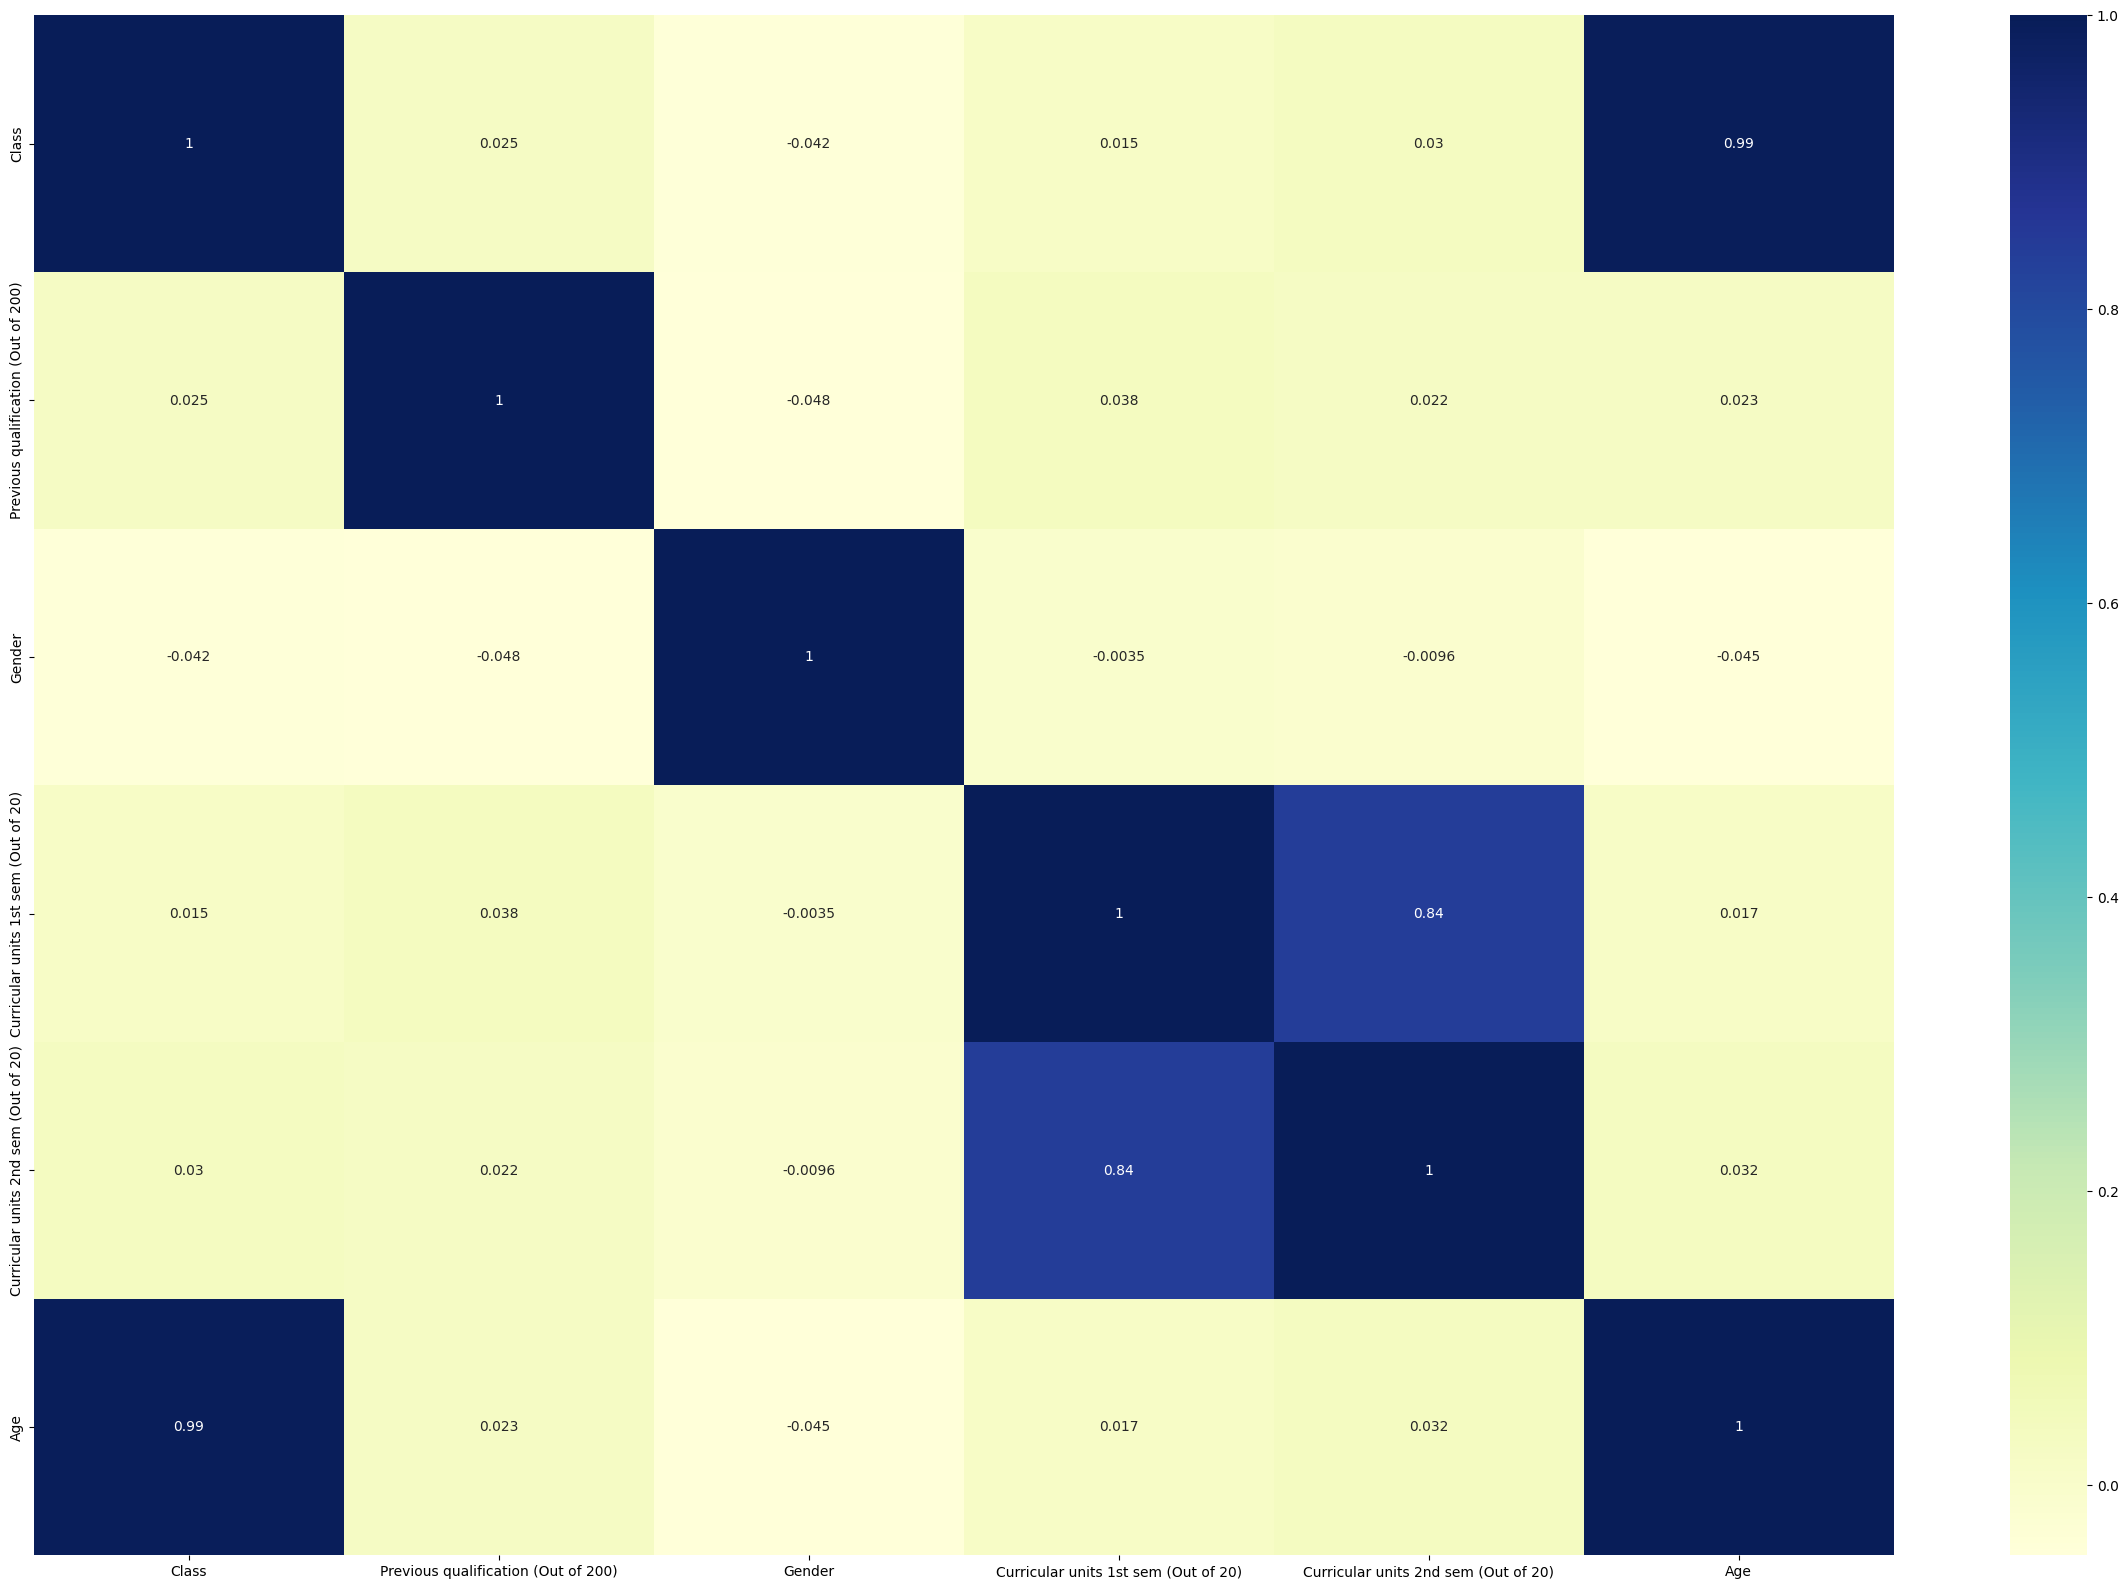

In [166]:
plt.figure(figsize=(30,20))
d=df.corr(method="pearson")
sb.heatmap(d,cmap="YlGnBu",annot=True)
d

In [167]:
df['Target'].value_counts()

Studying    3003
Dropout     1421
Name: Target, dtype: int64

In [168]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [169]:
df['Target'].value_counts()

1    3003
0    1421
Name: Target, dtype: int64

<ipython-input-170-da5a61dc4644>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Target'],color="Green")


<Axes: xlabel='Target', ylabel='Density'>

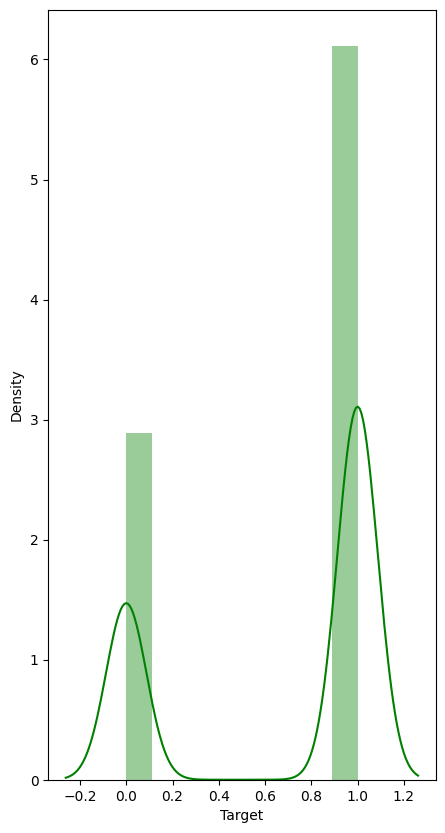

In [170]:
plt.figure(figsize=(5, 10))
sb.distplot(df['Target'],color="Green")

In [171]:
x = df.drop('Target',axis=1)
y = df['Target']

<ipython-input-172-28c19011bb2a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.iloc[:, i], color='blue')
<ipython-input-172-28c19011bb2a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.iloc[:, i], color='blue')
<ipython-input-172-28c19011bb2a>:5: UserWarning: 

`distplot` is a deprecate

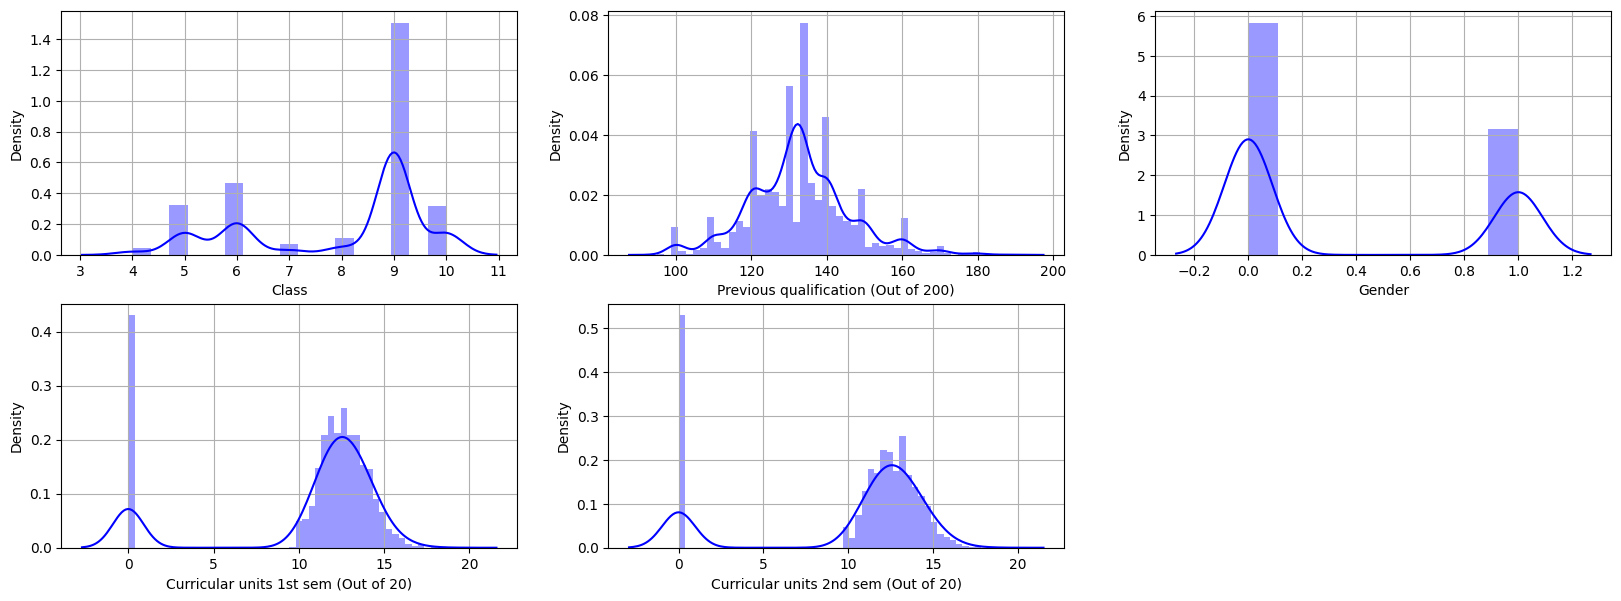

In [172]:
plt.figure(figsize=(20, 45))

for i in range(0, 5):
    plt.subplot(12,3,i+1)
    sb.distplot(df.iloc[:, i], color='blue')
    plt.grid()

In [173]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay

In [174]:
x = df.iloc[:, :5].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x)
x

[[  4.         135.           0.          13.29666667  14.11428571]
 [  4.         145.           1.          11.6         11.        ]
 [  4.         140.           0.          14.          13.5       ]
 ...
 [ 10.         130.           1.          13.75         0.        ]
 [ 10.         150.           1.          11.          10.5       ]
 [ 10.         120.           1.           0.           0.        ]]


array([[-2.33203586,  0.18098999, -0.73657203,  0.54837529,  0.74547346],
       [-2.33203586,  0.93932172,  1.35764048,  0.19804986,  0.14774701],
       [-2.33203586,  0.56015586, -0.73657203,  0.6935986 ,  0.62757329],
       ...,
       [ 1.16839164, -0.19817587,  1.35764048,  0.64197894, -1.96348862],
       [ 1.16839164,  1.31848759,  1.35764048,  0.07416267,  0.05178175],
       [ 1.16839164, -0.9565076 ,  1.35764048, -2.19710239, -1.96348862]])

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [180]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Studying', 'Dropout'])
    cm.plot()

In [181]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [182]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.8418079096045198
Recall :  0.8418079096045198
Accuracy :  0.8418079096045198
F1 Score :  0.8418079096045198

 [[148 116]
 [ 24 597]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       264
           1       0.84      0.96      0.90       621

    accuracy                           0.84       885
   macro avg       0.85      0.76      0.79       885
weighted avg       0.84      0.84      0.83       885

******************************************************



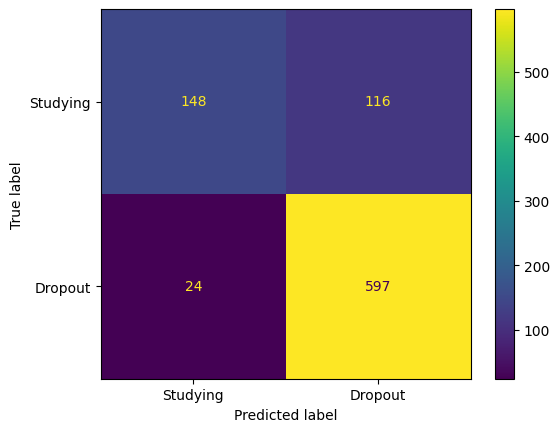

In [183]:
perform(y_pred_lr)

In [184]:
from sklearn.svm import SVC
SVCClf = SVC(kernel = 'rbf')
SVCClf.fit(x, y)

SVC()

In [197]:
y_pred_svc = SVCClf.predict(x_test)

In [198]:
acs = accuracy_score(y_test, y_pred_svc)
acs

0.8440677966101695

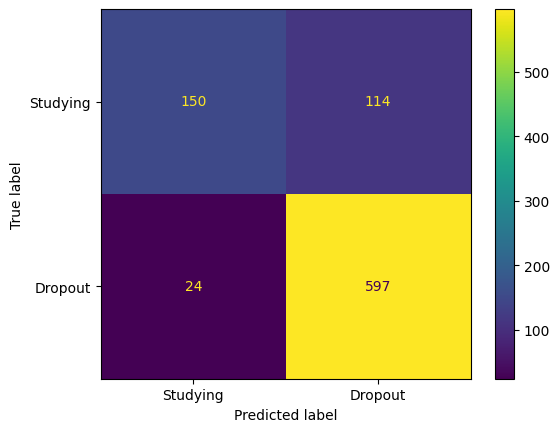

In [199]:
cn= confusion_matrix(y_test, y_pred_svc)
cn
cd = ConfusionMatrixDisplay(confusion_matrix = cn, display_labels=['Studying', 'Dropout'])
cd.plot()

In [189]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [200]:
Y_pred_DTC = clf.predict(x_test)

In [201]:
acs = accuracy_score(y_test, Y_pred_DTC)
acs

0.9751412429378531

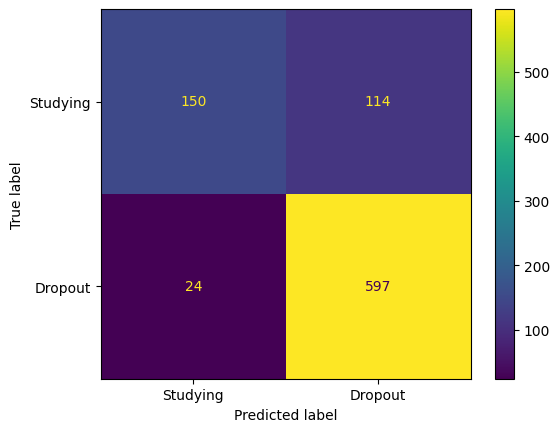

In [202]:
cm= confusion_matrix(y_test, Y_pred_DTC)
cm
cd = ConfusionMatrixDisplay(confusion_matrix = cn, display_labels=['Studying', 'Dropout'])
cd.plot()

In [203]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x, y)

RandomForestClassifier(random_state=0)

In [204]:
y_pred_RFC = clf.predict(x_test)
acs = accuracy_score(y_test, y_pred_RFC)
acs

0.9751412429378531

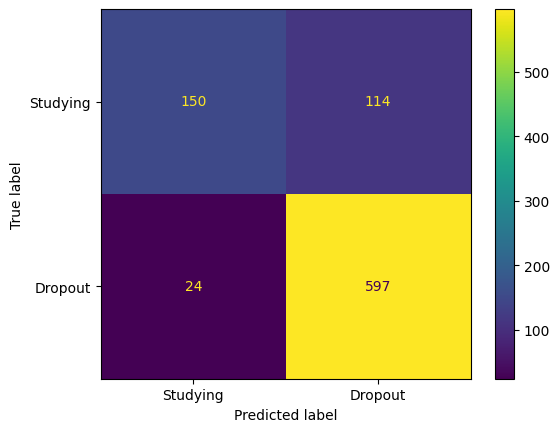

In [205]:
cm= confusion_matrix(y_test, y_pred_RFC)
cm
cd = ConfusionMatrixDisplay(confusion_matrix = cn, display_labels=['Studying', 'Dropout'])
cd.plot()

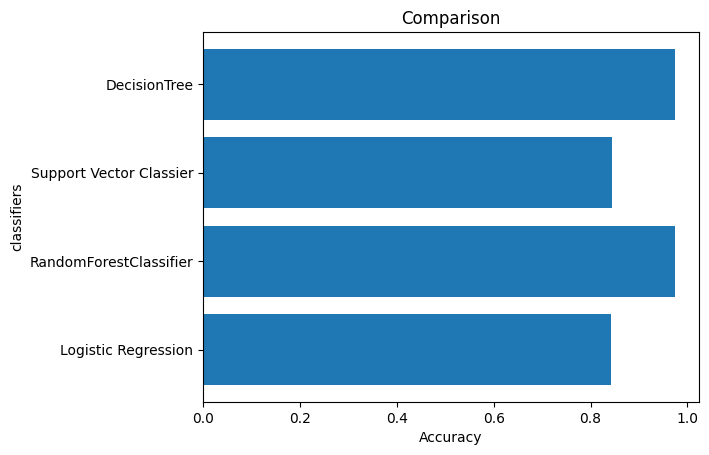

In [207]:
pred=[y_pred_lr,y_pred_RFC,y_pred_svc,Y_pred_DTC]
acc=[]
classifiers=["Logistic Regression","RandomForestClassifier","Support Vector Classier","DecisionTree"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()